In [111]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report
from sklearn.svm import SVC
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

1-Dataset: Utilize o Fashion MNIST dataset, que consiste em imagens de roupas e acessórios em escala de cinza.


# Pré-processamento de dados
(Utilize em todo o exercício o parâmetro random_state=42):

Carregue o dataset Fashion MNIST e realize uma análise exploratória dos dados.

Visualize algumas imagens do dataset para se familiarizar com os dados.

Faça o pré-processamento adequado para serem utilizadas nos modelos de Machine Learning que você escolher.

In [112]:
df = fetch_openml('Fashion-MNIST', version=1, cache=True)
X = df.data
y = df.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [113]:
sorted(y.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [114]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000
mean,0.000771,0.006414,0.034486,0.098886,0.247843,0.408714,0.802900,2.204386,5.634900,14.41000,...,34.582314,23.288643,16.611600,17.823371,22.887986,17.968129,8.524043,2.75140,0.836529,0.072914
std,0.087339,0.296605,1.200882,2.458872,4.408110,5.842288,8.186472,14.117208,23.698865,38.18827,...,57.584612,48.935288,42.075046,43.901606,51.853192,45.231601,29.527900,17.38577,9.258426,2.129924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,16.000000,45.000000,218.000000,185.000000,227.000000,230.000000,224.000000,225.000000,254.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,170.000000


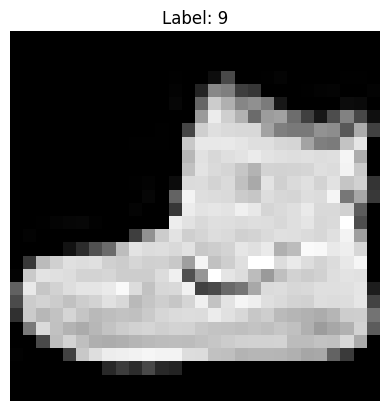

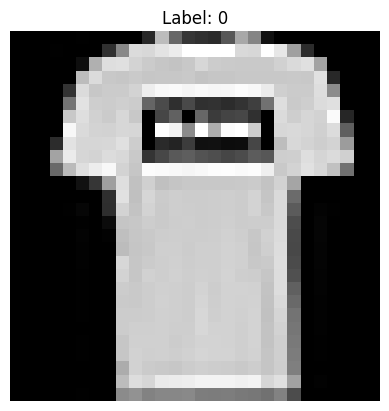

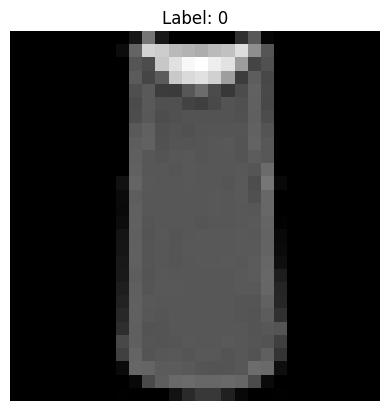

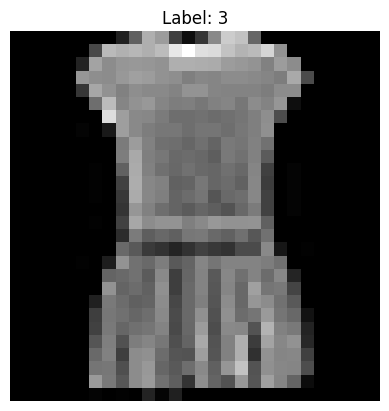

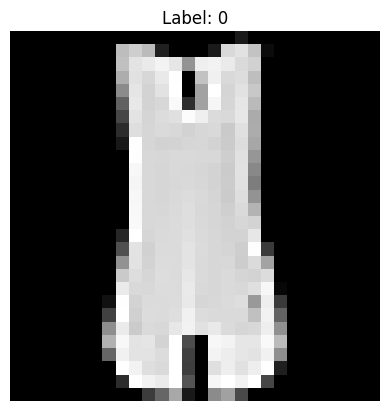

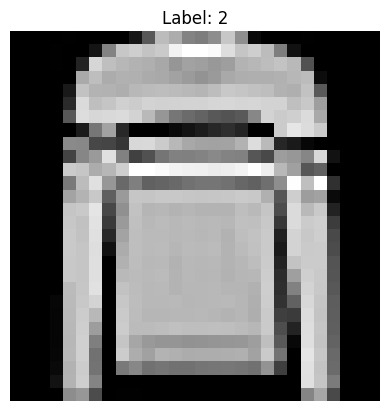

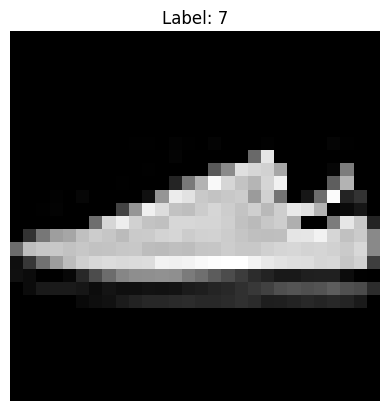

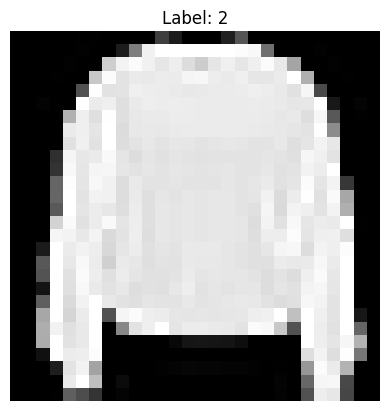

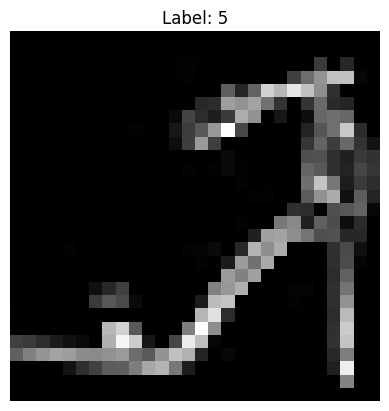

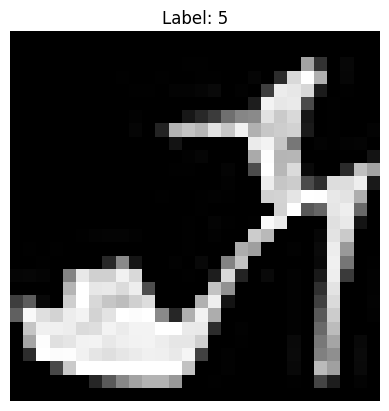

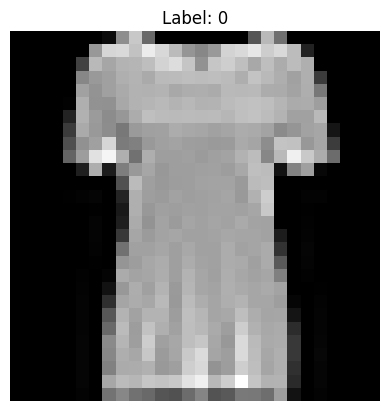

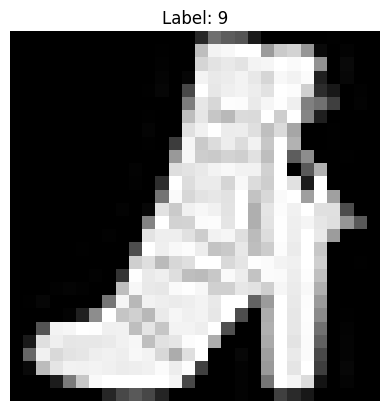

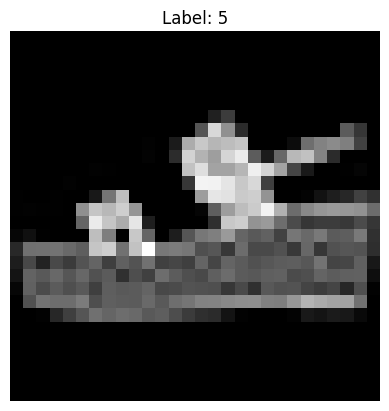

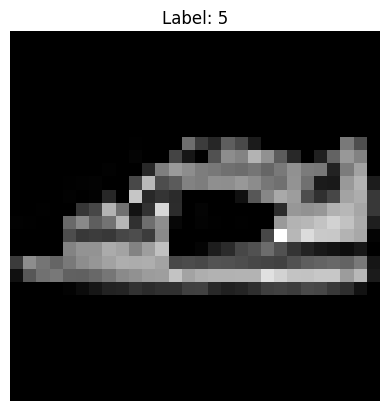

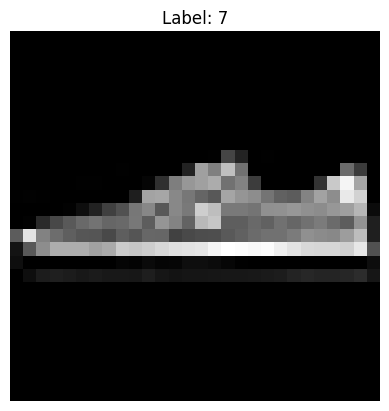

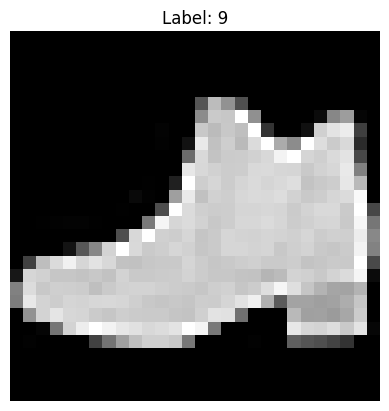

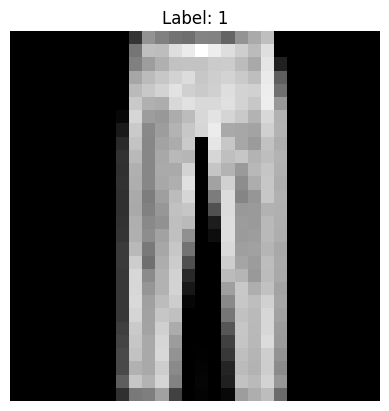

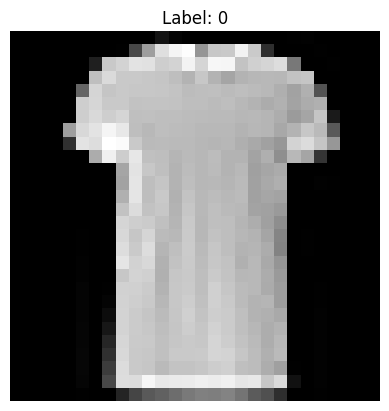

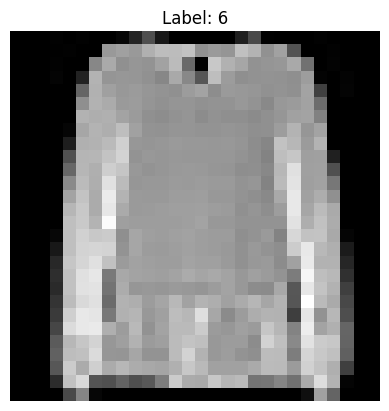

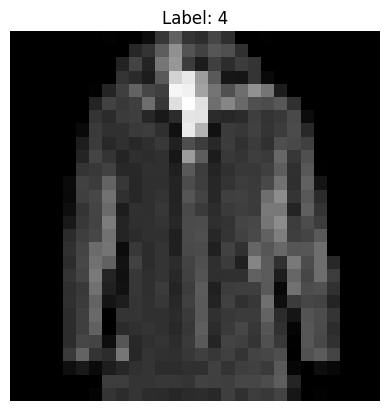

In [183]:
for idx in range(20):

    image = X.iloc[idx].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {y[idx]}')
    plt.axis('off')
    plt.show()

In [117]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
pca = PCA(n_components=0.85, random_state=42)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca)

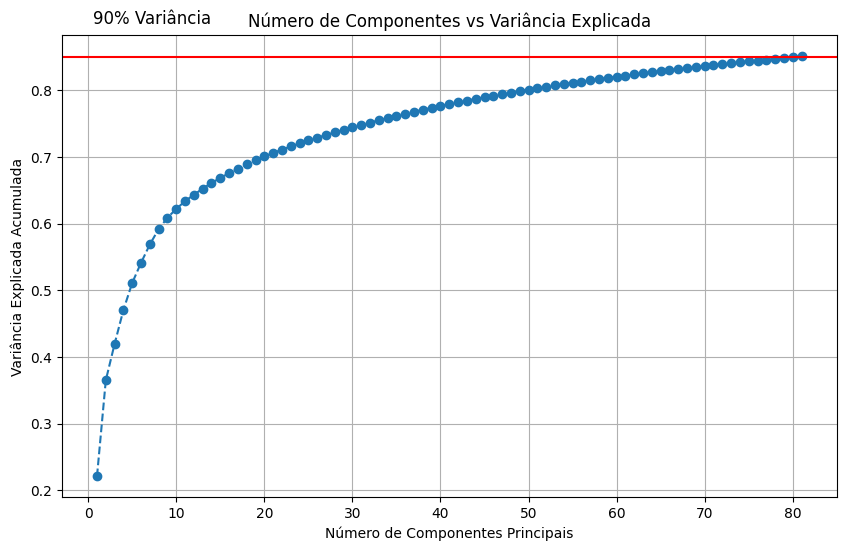

In [118]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Número de Componentes vs Variância Explicada')
plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% Variância', color = 'black', fontsize=12)
plt.grid()
plt.show()

In [119]:
X_pca_df

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-0.824695,20.862604,-12.906047,3.460004,-6.685124,1.063331,-0.091518,-5.409267,-3.940967,2.212183,...,0.395707,0.306618,1.337790,0.659319,0.135707,-1.476008,0.774890,1.052581,-0.435194,-1.291779
1,17.073390,-4.966217,-2.006993,5.976872,10.890454,4.840265,-11.935148,1.680182,-2.140208,-2.279279,...,-1.740758,1.004877,-0.080936,0.039905,-0.760878,-0.472084,-0.703772,-0.256668,2.269019,0.184300
2,-9.600036,-12.321928,1.119633,2.560292,0.221462,-1.002057,1.195672,-1.129121,-0.824532,-0.097080,...,0.270388,0.287462,0.305109,-0.002774,0.003401,0.750583,0.350802,-0.892633,-0.816732,0.336882
3,-0.310827,-11.590370,3.277311,4.219203,2.333541,0.581049,-2.163279,-0.629526,-0.778129,2.646809,...,0.961787,-0.363397,-0.624465,-0.057305,0.166464,-0.060818,0.504651,-0.069404,-0.729935,0.059745
4,8.975907,-12.880551,-10.266693,-2.475537,-0.558260,3.636134,3.175745,0.497615,-1.677332,-0.348331,...,-1.152829,-0.623221,0.408722,-0.727211,0.302359,-0.284470,-0.665197,1.070405,0.045731,-0.620708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-5.775710,16.066842,-10.505418,5.455900,-5.030251,-2.988098,-5.453345,-8.431069,-3.297726,2.349719,...,-0.569222,0.511687,1.519844,0.221930,-0.148373,-0.061893,-0.037885,-0.268604,-2.093171,-0.516973
69996,-11.615810,-14.296728,0.713013,2.193292,0.077477,-4.222066,3.916901,-0.669775,-1.626693,1.579883,...,0.842112,-0.205651,1.264882,-0.115144,-0.473368,0.042217,-0.462139,0.067983,0.282320,0.662221
69997,-6.993530,-8.488647,0.395531,6.611096,-1.262143,13.461743,2.065427,-6.367112,-2.567024,0.465481,...,-0.775287,-0.203237,1.176485,-0.192351,0.932536,0.178469,0.005372,-0.566512,-0.795446,-0.007873
69998,-2.892285,-15.376467,-7.599814,-0.977956,-1.680602,-6.362893,5.586837,1.810039,-0.144406,0.415630,...,-1.593883,-0.024891,-1.952182,1.372277,0.728015,-0.693878,-0.066301,1.055050,-0.557938,-0.896186


# Modelagem

Divida o dataset em conjuntos de treinamento (80%) e teste (20%).

Treine diferentes modelos para realizar a tarefa (utilize apenas modelos vistos em aula).

Ajuste os hiperparâmetros dos modelos utilizando técnicas como Grid Search, Randomized Search, etc.

Avalie o desempenho dos modelos utilizando métricas adequadas este dataset

# Divida o dataset em conjuntos de treinamento (80%) e teste (20%).

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

In [121]:
distribuicao_treino = np.bincount(y_train)
distribuicao_teste = np.bincount(y_test)

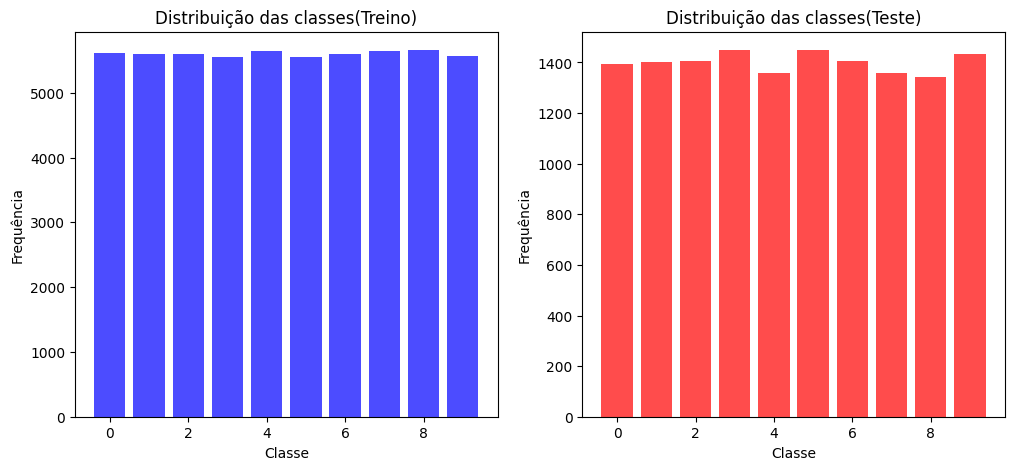

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(range(10), distribuicao_treino, color='blue', alpha=0.7)
axes[0].set_title('Distribuição das classes(Treino)')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Frequência')

axes[1].bar(range(10), distribuicao_teste, color='red', alpha=0.7)
axes[1].set_title('Distribuição das classes(Teste)')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Frequência')

plt.show()

# SVM

In [107]:
import time
tempo_inicial_treinamento=time.time()
svm_model = SVC(kernel='rbf',random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}
# Configura o GridSearchCV
grid_search_svc = GridSearchCV(svm_model, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search_svc.fit(X_train, y_train)
tempo_final_treinamento = time.time()
best_params_grid_svm = grid_search_svc.best_params_
print(f'Melhores parâmetros (Grid Search): {best_params_grid_svm}')


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Melhores parâmetros (Grid Search): {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [108]:
best_params_grid_svm

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [150]:
tempo_duracao_svm = tempo_final_treinamento-tempo_inicial_treinamento

In [151]:
tempo_duracao_svm

6667.238831996918

In [109]:
y_pred_svm = grid_search_svc.predict(X_test)

In [110]:
report = classification_report(y_test, y_pred_svm, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.832523,0.859397,0.845747,1394.000000
1,0.990539,0.970756,0.980548,1402.000000
2,0.828203,0.822317,0.825250,1407.000000
3,0.885619,0.913734,0.899457,1449.000000
4,0.805278,0.831982,0.818412,1357.000000
5,0.974053,0.958592,0.966261,1449.000000
6,0.752521,0.689410,0.719585,1407.000000
7,0.931206,0.966152,0.948357,1359.000000
8,0.967599,0.979136,0.973333,1342.000000
9,0.967376,0.951185,0.959212,1434.000000


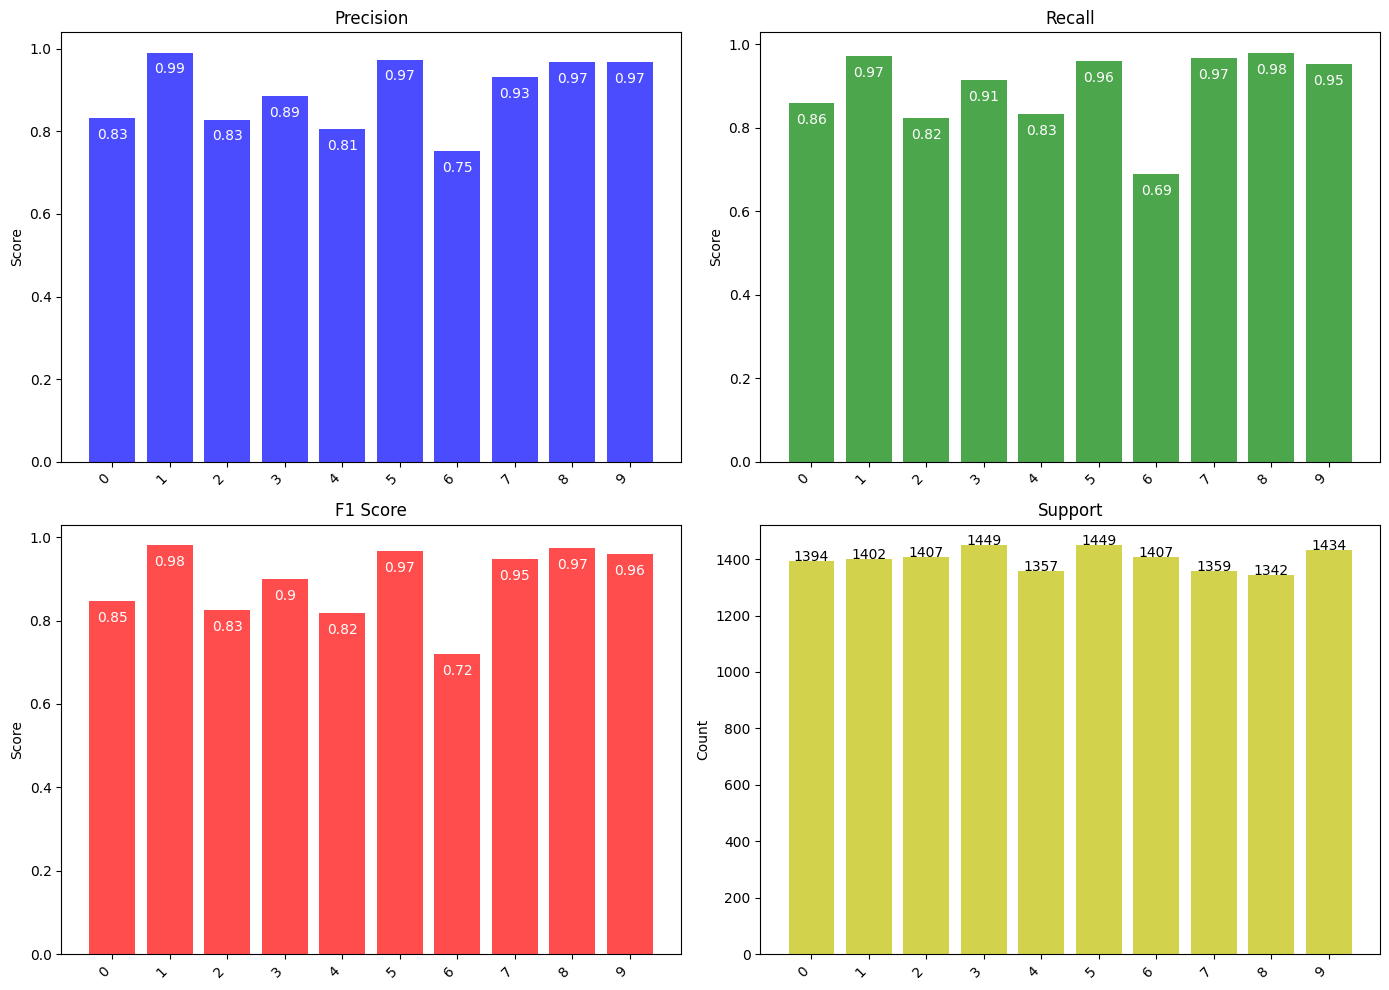

In [123]:
report = classification_report(y_test, y_pred_svm, output_dict=True)

# Extrair as classes do relatório
classes = list(report.keys())[:-3]  # Ignorando as últimas 3 entradas que não são classes


# Inicializar listas para precisão, recall e f1 score
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Plotar os gráficos
x = np.arange(len(classes))  # posições no eixo x

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico de precisão
bars1 = axs[0, 0].bar(x, precision, color='b', alpha=0.7)
axs[0, 0].set_title('Precision')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(classes, rotation=45, ha="right")
axs[0, 0].set_ylabel('Score')

for bar, val in zip(bars1, precision):
    axs[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, round(val, 2), ha='center', color='white')

# Gráfico de recall
bars2 = axs[0, 1].bar(x, recall, color='g', alpha=0.7)
axs[0, 1].set_title('Recall')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(classes, rotation=45, ha="right")
axs[0, 1].set_ylabel('Score')


for bar, val in zip(bars2, recall):
    axs[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, round(val, 2), ha='center', color='white')

# Gráfico de F1 score
bars3 = axs[1, 0].bar(x, f1_score, color='r', alpha=0.7)
axs[1, 0].set_title('F1 Score')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(classes, rotation=45, ha="right")
axs[1, 0].set_ylabel('Score')


for bar, val in zip(bars3, f1_score):
    axs[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, round(val, 2), ha='center', color='white')

# Gráfico de suporte
support = [report[cls]['support'] for cls in classes]
bars4 = axs[1, 1].bar(x, support, color='y', alpha=0.7)
axs[1, 1].set_title('Support')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(classes, rotation=45, ha="right")
axs[1, 1].set_ylabel('Count')


for bar, val in zip(bars4, support):
    axs[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, val, ha='center', color='black')

plt.tight_layout()
plt.show()

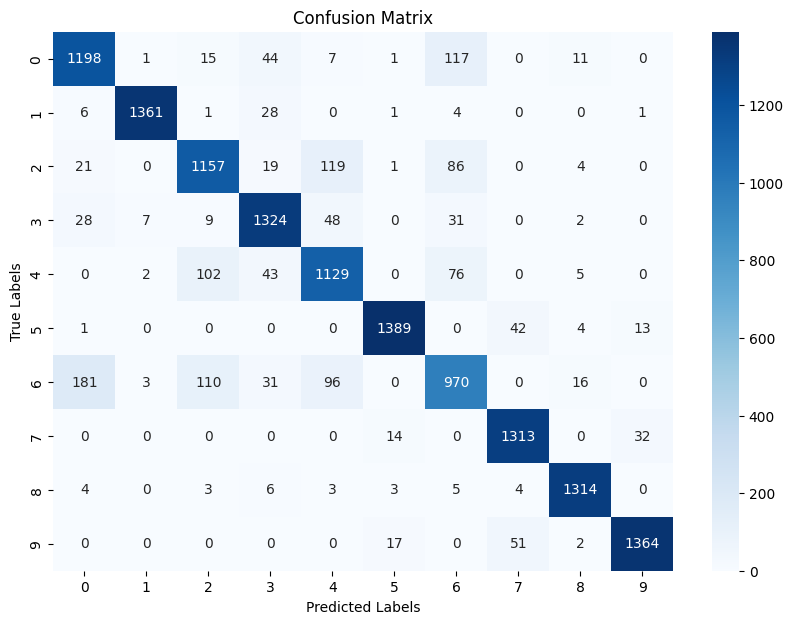

In [124]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [125]:
tempo_final_treinamento_inicial_knn=time.time()
knn_model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, n_jobs=-1, verbose=1)

grid_search_knn.fit(X_train, y_train)
tempo_final_treinamento_final_knn=time.time()
best_knn_grid = grid_search_knn.best_estimator_
y_pred_knn = best_knn_grid.predict(X_test)
print("Acurácia do KNN após Grid Search:", accuracy_score(y_test, y_pred_grid))
print("Melhores parâmetros do Grid Search:", grid_search_knn.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Acurácia do KNN após Grid Search: 0.8681428571428571
Melhores parâmetros do Grid Search: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [134]:
print("Acurácia do KNN após Grid Search:", accuracy_score(y_test, y_pred_knn))
print("Melhores parâmetros do Grid Search:", grid_search_knn.best_params_)

Acurácia do KNN após Grid Search: 0.8681428571428571
Melhores parâmetros do Grid Search: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [148]:
duracao_tempo_knn = tempo_final_treinamento_final_knn- tempo_final_treinamento_inicial_knn

In [149]:
duracao_tempo_knn

1553.287804365158

In [140]:
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_knn = pd.DataFrame(report_knn).transpose()
report_df

,precision,recall,f1-score,support
0,0.832523,0.859397,0.845747,1394.000000
1,0.990539,0.970756,0.980548,1402.000000
2,0.828203,0.822317,0.825250,1407.000000
3,0.885619,0.913734,0.899457,1449.000000
4,0.805278,0.831982,0.818412,1357.000000
5,0.974053,0.958592,0.966261,1449.000000
6,0.752521,0.689410,0.719585,1407.000000
7,0.931206,0.966152,0.948357,1359.000000
8,0.967599,0.979136,0.973333,1342.000000
9,0.967376,0.951185,0.959212,1434.000000


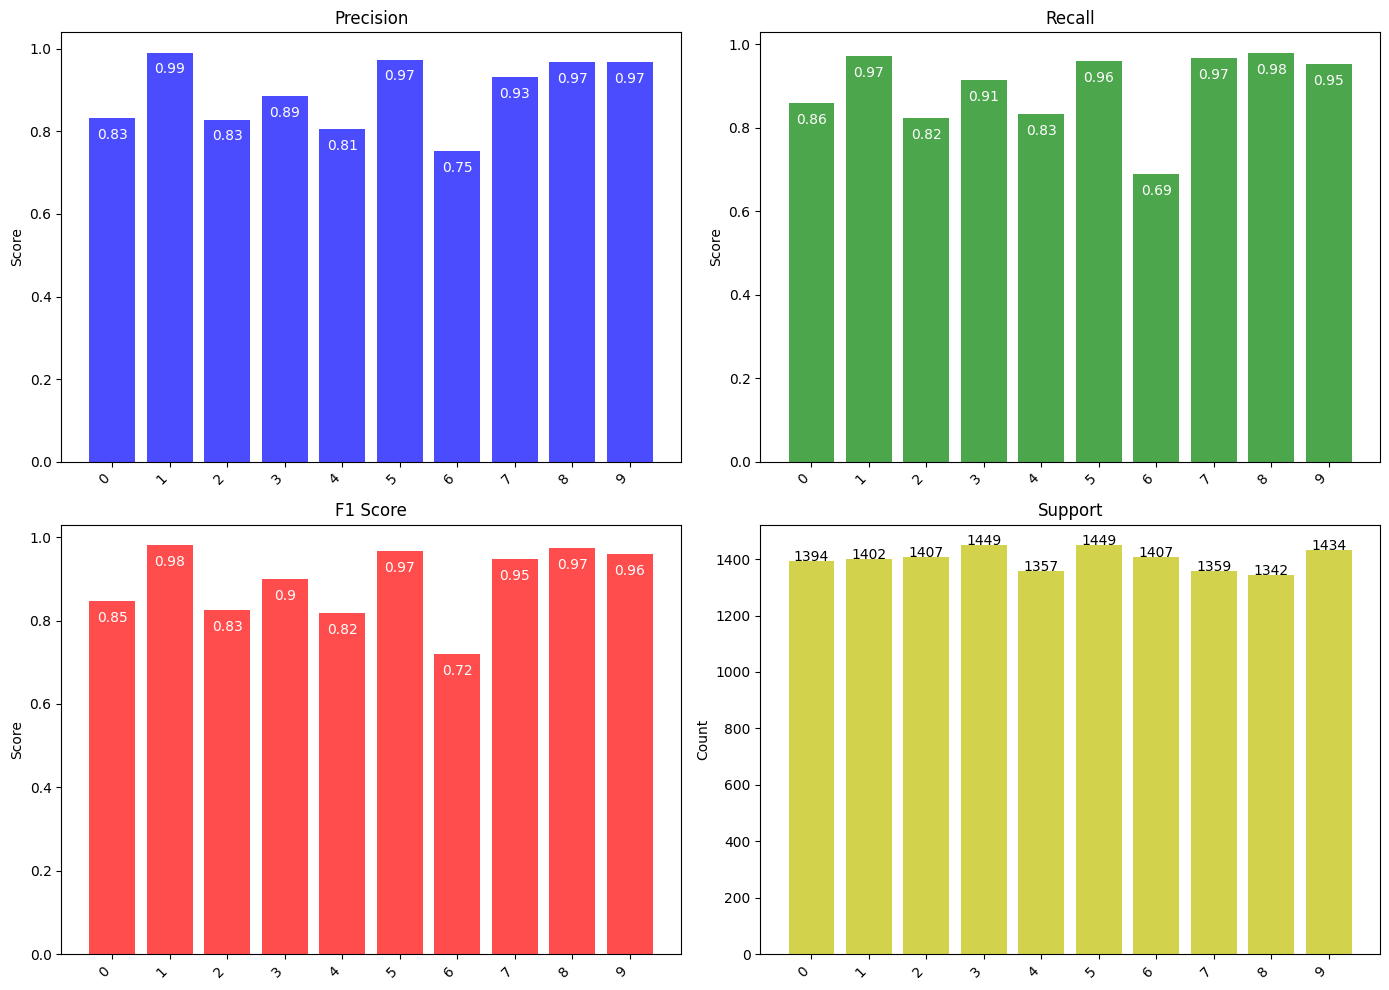

In [137]:

# Extrair as classes do relatório
classes = list(report.keys())[:-3]  # Ignorando as últimas 3 entradas que não são classes


# Inicializar listas para precisão, recall e f1 score
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Plotar os gráficos
x = np.arange(len(classes))  # posições no eixo x

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico de precisão
bars1 = axs[0, 0].bar(x, precision, color='b', alpha=0.7)
axs[0, 0].set_title('Precision')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(classes, rotation=45, ha="right")
axs[0, 0].set_ylabel('Score')

for bar, val in zip(bars1, precision):
    axs[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, round(val, 2), ha='center', color='white')

# Gráfico de recall
bars2 = axs[0, 1].bar(x, recall, color='g', alpha=0.7)
axs[0, 1].set_title('Recall')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(classes, rotation=45, ha="right")
axs[0, 1].set_ylabel('Score')


for bar, val in zip(bars2, recall):
    axs[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, round(val, 2), ha='center', color='white')

# Gráfico de F1 score
bars3 = axs[1, 0].bar(x, f1_score, color='r', alpha=0.7)
axs[1, 0].set_title('F1 Score')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(classes, rotation=45, ha="right")
axs[1, 0].set_ylabel('Score')


for bar, val in zip(bars3, f1_score):
    axs[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, round(val, 2), ha='center', color='white')

# Gráfico de suporte
support = [report[cls]['support'] for cls in classes]
bars4 = axs[1, 1].bar(x, support, color='y', alpha=0.7)
axs[1, 1].set_title('Support')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(classes, rotation=45, ha="right")
axs[1, 1].set_ylabel('Count')


for bar, val in zip(bars4, support):
    axs[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, val, ha='center', color='black')

plt.tight_layout()
plt.show()

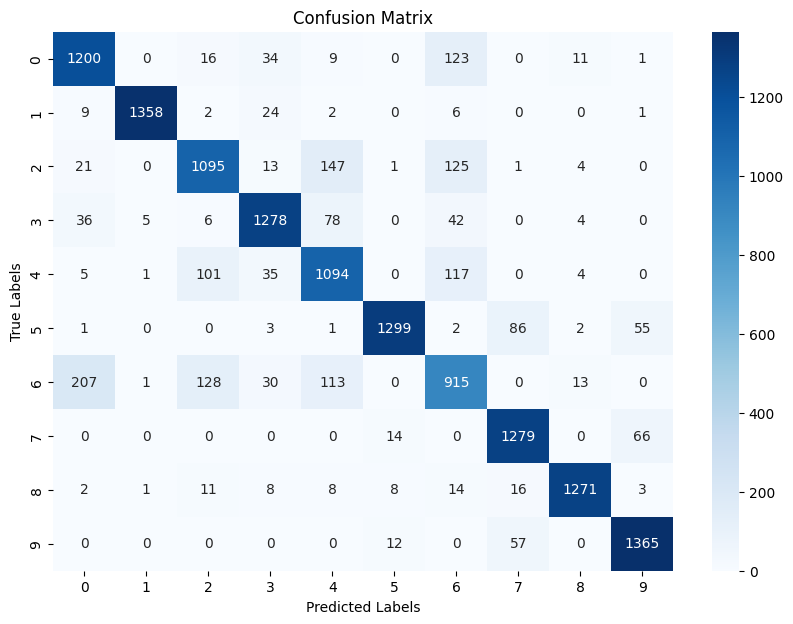

In [128]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [178]:
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
def get_average_metrics(report):
    precision = []
    recall = []
    f1_score = []
    support = []

    for key, value in report.items():
        if key not in ('accuracy', 'macro avg', 'weighted avg'):
            precision.append(value['precision'])
            recall.append(value['recall'])
            f1_score.append(value['f1-score'])
            support.append(value['support'])

    avg_precision = np.mean(precision)
    avg_recall = np.mean(recall)
    avg_f1_score = np.mean(f1_score)
    avg_support = np.mean(support)

    return {
        'avg_precision': avg_precision,
        'avg_recall': avg_recall,
        'avg_f1_score': avg_f1_score,
        'avg_support': avg_support
    }

# Calculando a média das métricas para KNN e SVM
avg_metrics_knn = get_average_metrics(report_knn)
avg_metrics_svm = get_average_metrics(report_svm)

print("Médias das métricas para KNN:", avg_metrics_knn)
print("Médias das métricas para SVM:", avg_metrics_svm)

Médias das métricas para KNN: {'avg_precision': 0.8690273494647757, 'avg_recall': 0.8682787784037199, 'avg_f1_score': 0.8681210076665227, 'avg_support': 1400.0}
Médias das métricas para SVM: {'avg_precision': 0.8934916956023343, 'avg_recall': 0.8942661310625114, 'avg_f1_score': 0.8936160699319396, 'avg_support': 1400.0}


# Comparação entre os dois modelos

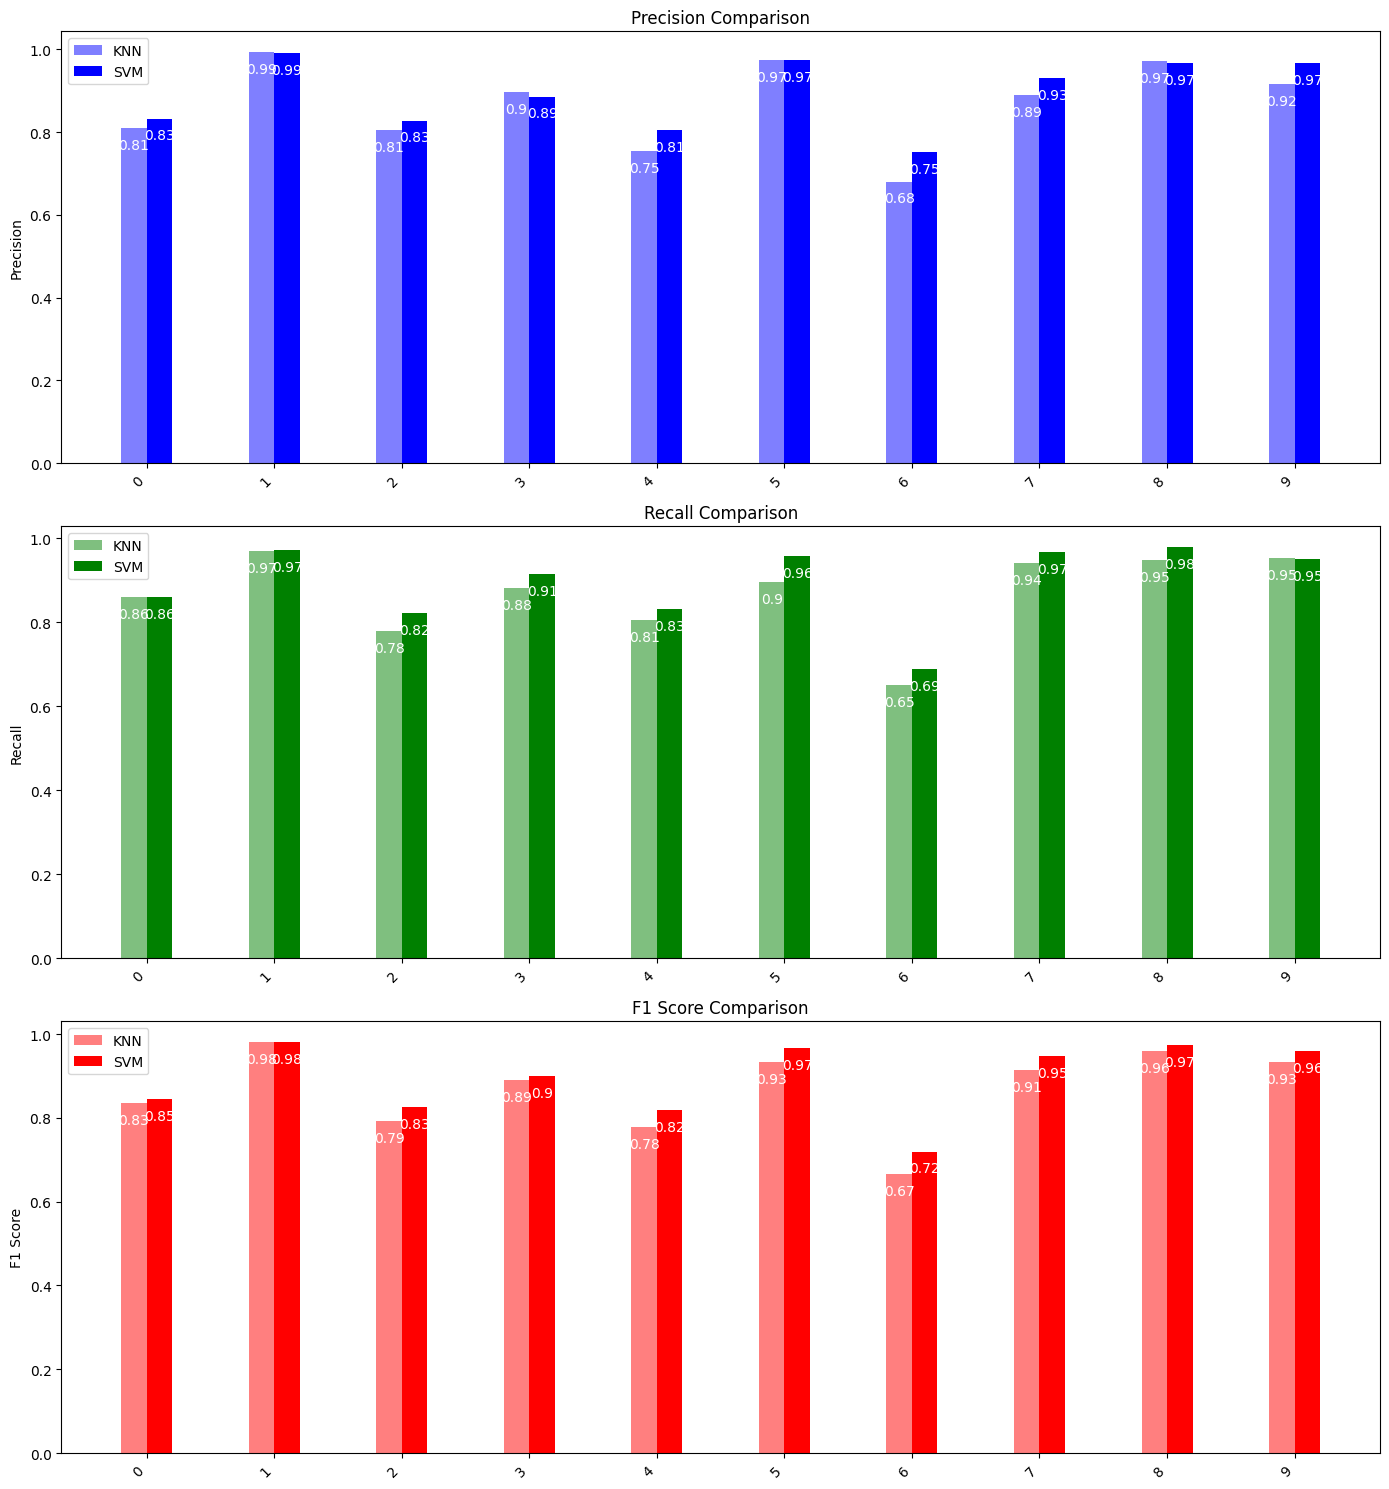

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Supondo que y_test, y_pred_grid e y_pred_svm já estejam definidos
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Extrair as classes do relatório
classes = list(report_knn.keys())[:-3]  # Ignorando as últimas 3 entradas que não são classes

# Inicializar listas para precisão, recall e f1 score para ambos os modelos
precision_knn = [report_knn[cls]['precision'] for cls in classes]
recall_knn = [report_knn[cls]['recall'] for cls in classes]
f1_score_knn = [report_knn[cls]['f1-score'] for cls in classes]

precision_svm = [report_svm[cls]['precision'] for cls in classes]
recall_svm = [report_svm[cls]['recall'] for cls in classes]
f1_score_svm = [report_svm[cls]['f1-score'] for cls in classes]

# Definir a posição das barras
x = np.arange(len(classes))  # posições no eixo x
width = 0.2  # largura das barras

fig, axs = plt.subplots(3, 1, figsize=(14, 15))

# Gráfico de precisão
bars1 = axs[0].bar(x - width/2, precision_knn, width, label='KNN', color='b', alpha=0.5)
bars2 = axs[0].bar(x + width/2, precision_svm, width, label='SVM', color='b', alpha=1.0)
axs[0].set_title('Precision Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(classes, rotation=45, ha="right")
axs[0].set_ylabel('Precision')
axs[0].legend()

for bar, val in zip(bars1 + bars2, precision_knn + precision_svm):
    axs[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, round(val, 2), ha='center', color='white')

# Gráfico de recall
bars3 = axs[1].bar(x - width/2, recall_knn, width, label='KNN', color='g', alpha=0.5)
bars4 = axs[1].bar(x + width/2, recall_svm, width, label='SVM', color='g', alpha=1.0)
axs[1].set_title('Recall Comparison')
axs[1].set_xticks(x)
axs[1].set_xticklabels(classes, rotation=45, ha="right")
axs[1].set_ylabel('Recall')
axs[1].legend()

for bar, val in zip(bars3 + bars4, recall_knn + recall_svm):
    axs[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, round(val, 2), ha='center', color='white')

# Gráfico de F1 score
bars5 = axs[2].bar(x - width/2, f1_score_knn, width, label='KNN', color='r', alpha=0.5)
bars6 = axs[2].bar(x + width/2, f1_score_svm, width, label='SVM', color='r', alpha=1.0)
axs[2].set_title('F1 Score Comparison')
axs[2].set_xticks(x)
axs[2].set_xticklabels(classes, rotation=45, ha="right")
axs[2].set_ylabel('F1 Score')
axs[2].legend()

for bar, val in zip(bars5 + bars6, f1_score_knn + f1_score_svm):
    axs[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, round(val, 2), ha='center', color='white')

plt.tight_layout()
plt.show()


In [153]:
tempos = [duracao_tempo_knn,tempo_duracao_svm]
for  x in tempos:
    print(x)

1553.287804365158
6667.238831996918


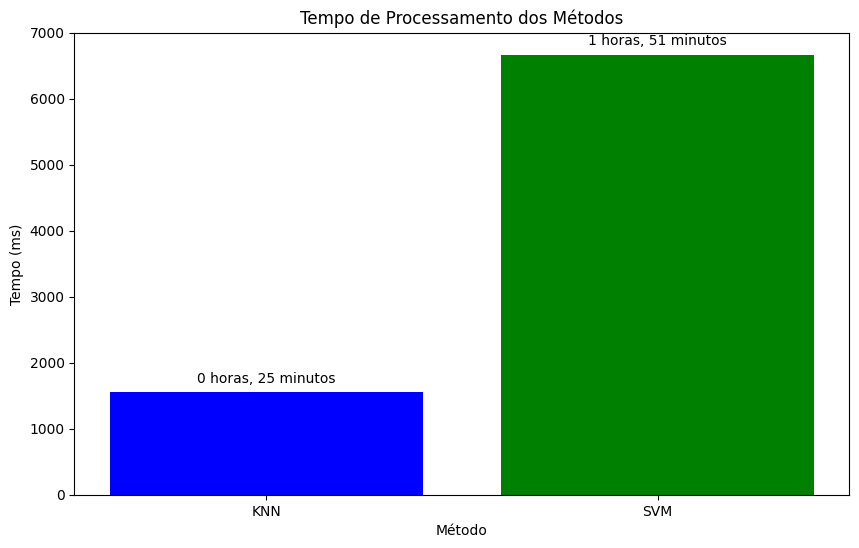

In [180]:
import matplotlib.pyplot as plt


# Nome dos métodos
metodos = ['KNN', 'SVM']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(metodos, tempos, color=['blue', 'green'])

# Adicionar título e rótulos aos eixos
plt.title('Tempo de Processamento dos Métodos')
plt.xlabel('Método')
plt.ylabel('Tempo (ms)')
def converter_tempo(tempo_segundos):
    horas = int(tempo_segundos // 3600)
    minutos = int((tempo_segundos % 3600) // 60)
    segundos = tempo_segundos % 60
    return f"{horas} horas, {minutos} minutos"
# Exibir os valores acima das barras
for i, tempo in enumerate(tempos):
    plt.text(i, tempo + 100, converter_tempo(tempo), ha='center', va='bottom')

# Mostrar o gráfico
plt.show()


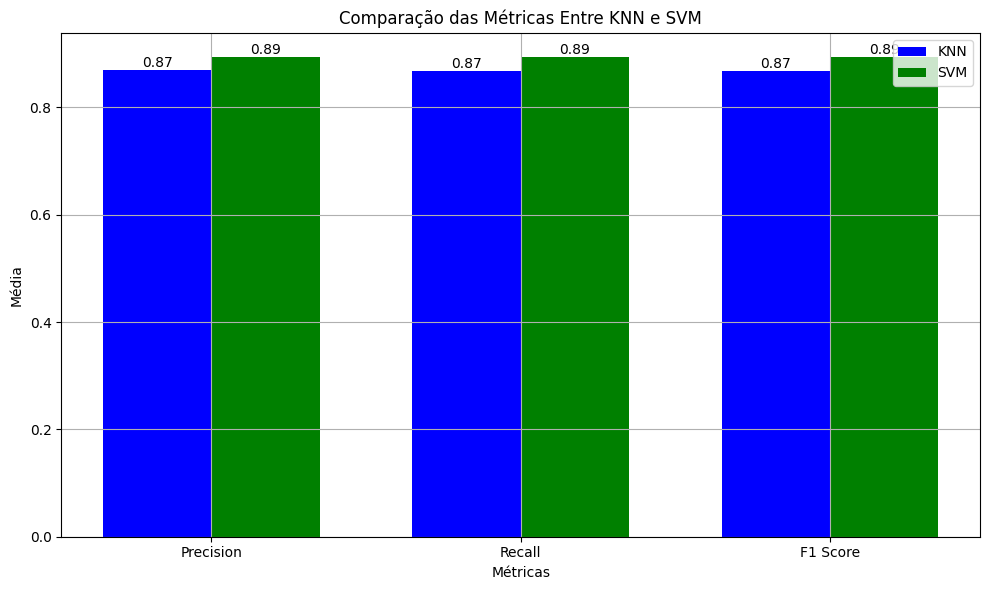

In [181]:
import matplotlib.pyplot as plt



# Largura das barras
bar_width = 0.35
index = np.arange(len(metrics))

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

bar1 = plt.bar(index, avg_knn, bar_width, label='KNN', color='blue')
bar2 = plt.bar(index + bar_width, avg_svm, bar_width, label='SVM', color='green')

plt.xlabel('Métricas')
plt.ylabel('Média')
plt.title('Comparação das Métricas Entre KNN e SVM')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.grid(True)

# Adicionando os valores acima das barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()


# Avaliação (entrega de texto):

### Pré-processamento dos Dados
Para garantir que os modelos de aprendizado de máquina fossem treinados de forma eficiente e com melhor performance, as seguintes etapas de pré-processamento foram realizadas:

1. **Normalização dos Dados:**
   - **Ferramenta Utilizada:** Standard Scaler
   - **Motivação:** Tanto o KNN quanto o SVM são sensíveis à escala dos dados:
     - **KNN:** Calcula distâncias entre pontos, o que pode ser distorcido se as características tiverem escalas diferentes.
     - **SVM:** Traça hiperplanos entre classes, e uma escala inadequada pode influenciar a posição e a orientação desses hiperplanos.
   - **Processo:** Os dados foram padronizados para ter média zero e desvio padrão igual a um, garantindo que todas as características contribuíssem de maneira equilibrada para os modelos.

2. **Redução de Dimensionalidade:**
   - **Ferramenta Utilizada:** PCA
   - **Motivação:** Melhorar o tempo de treinamento e reduzir a complexidade dos dados.
   - **Processo:** O PCA foi aplicado para transformar os dados em um conjunto de componentes principais, mantendo a maior parte da variância dos dados originais, mas com uma dimensionalidade reduzida.

### Comparação dos Modelos

#### SVM Não Linear
**Pontos Fortes:**
- **Desempenho Superior:** Apresentou métricas de avaliação ligeiramente melhores em relação ao KNN (accuracy, precision, recall e F1 de 0.89 vs. 0.87 para o KNN).

**Pontos Fracos:**
- **Custo Computacional Elevado:** O treinamento foi significativamente mais caro, levando 1 hora e 51 minutos em comparação aos 25 minutos do KNN.

#### KNN (K-Nearest Neighbors)
**Pontos Fortes:**
- **Simplicidade e Rapidez no Treinamento:** Muito mais rápido no treinamento, completando em 25 minutos comparado aos 1 hora e 51 minutos da SVM.

**Pontos Fracos:**
- **Desempenho Ligeiramente Inferior:** Teve métricas de avaliação um pouco inferiores (0.87 contra 0.89 da SVM).

### Explicação das Métricas de Avaliação e Interpretação dos Resultados

#### Métricas Utilizadas:
1. **Accuracy:** Proporção de previsões corretas entre o total de previsões feitas.
2. **Precision:** Proporção de verdadeiros positivos em relação ao total de positivos previstos.
3. **Recall:** Proporção de verdadeiros positivos em relação ao total de positivos reais.
4. **F1 Score:** Média harmônica da precisão e recall, que considera ambos de forma equilibrada.

#### Interpretação dos Resultados:
- **Accuracy de 0.87 e 0.89:** Indica que ambos os modelos têm uma alta proporção de previsões corretas, com a SVM apresentando uma ligeira vantagem.
- **Precision, Recall e F1 iguais às respectivas accuracies:** Sugere que os modelos são balanceados e eficazes tanto na identificação correta de positivos quanto na minimização de falsos positivos e falsos negativos.

### Tabela Comparativa

| Nome do Modelo | Accuracy (%) | Precision | Recall | F1   | Tempo de Execução (ms) |
|----------------|--------------|-----------|--------|------|------------------------|
| KNN            | 0.87         | 0.87      | 0.87   | 0.87 | 1553 (25 minutos)      |
| SVM            | 0.89         | 0.89      | 0.89   | 0.89 | 6667 (1h 51 minutos)   |

### Escolha do Modelo:
- Devido a ambos os modelos terem desempenhado de forma similiar o modelo final que escolheria seria o KNN dado que o custo computacional de treinamento do mesmo foi menor comparado com o SVM



# Salve o modelo criado em um arquivo

In [145]:
import joblib
joblib.dump(grid_search_knn, './modelo_knn.pkl')


['./modelo_knn.pkl']

In [146]:
joblib.dump(grid_search_svc, './modelo_svm.pkl')

['./modelo_svm.pkl']